In [ ]:
!pip install keras keras-hub matplotlib --upgrade -q


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [4]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Chapter 3 - Introduction to TensorFlow, PyTorch, JAX, and Keras
In this chapter, we will explore the most popular deep learning frameworks: TensorFlow, PyTorch, JAX, and Keras. We will discuss their features, advantages, and disadvantages, and provide examples of how to use each framework for building and training neural networks.
What does a deep learning framework provide?
1. **Tensor operations**: Efficient implementations of tensor operations for CPU (and optionally GPU).
1. **Gradient computation**: Automatic differentiation to compute gradients for backpropagation.

Those frameworks may also provide higher-level functionalities, such as:
1. **Neural network layers**: Abstractions for common neural network layers (e.g., Dense, Convolutional).
1. **Model abstractions**: High-level APIs for defining, training, and evaluating models.
1. **Loss functions and optimizers**: Predefined loss functions and optimization algorithms.

Keras, TensorFlow, PyTorch, and JAX do not have all the same features. Keras is a high-level API that can run on top of the other three frameworks, providing a user-friendly interface for building and training models. TensorFlow and PyTorch are more comprehensive frameworks that provide both low-level tensor operations and high-level model abstractions.

### TensorFlow
TensorFlow is an open-source deep learning framework developed by Google. It provides a comprehensive ecosystem for building and deploying machine learning models. TensorFlow supports both CPU and GPU computations and offers a wide range of tools and libraries for various machine learning tasks.
Let's see some syntax examples in TensorFlow.

#### Constant tensors
Constant tensors are immutable tensors whose values cannot be changed after they are created. In TensorFlow, you can create constant tensors using the functions below:

In [6]:
# Constant tensors
import tensorflow as tf

# Useful for initializations
t = tf.ones(shape=(2, 1))
print(t, "\n")

t = tf.zeros(shape=(2, 1))
print(t, "\n")

t = tf.constant([1, 2, 3], dtype="float32")
print(t, "\n")


# Random tensors
# Normal distribution with mean and standard deviation
t = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(t, "\n")


# Uniform distribution with min and max values
t = tf.random.uniform(shape=(3, 1))
print(t, "\n")

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32) 

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32) 

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32) 

tf.Tensor(
[[0.99110955]
 [0.7440552 ]
 [0.403609  ]], shape=(3, 1), dtype=float32) 

tf.Tensor(
[[0.28929377]
 [0.39351285]
 [0.25418997]], shape=(3, 1), dtype=float32) 



#### Variable tensors
Constant tensors are immutable, so they are not suitable for representing model parameters that need to be updated during training. For this purpose, TensorFlow provides variable tensors, which are mutable and can be updated using optimization algorithms. You can create variable tensors using the `tf.Variable` class. An initial value must be provided when creating a variable tensor.

In [14]:
# If uncommented, this code will result in an exception: the constant tensors are not assignable
# t = tf.ones(shape=(1, 3), dtype=tf.dtypes.float32)
# t[0, 1] = 0.0

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v, "\n")
v.assign(tf.ones((3, 1)))
print(v, "\n")

v[0, 0].assign(3.)
print(v, "\n")

v.assign_add(tf.ones((3, 1)))
print(v, "\n")


<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.4364833 ],
       [ 0.13160914],
       [ 0.7666309 ]], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)> 

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)> 



#### Tensor operations
Here are some examples of basic tensor operations in TensorFlow:

In [28]:
a = tf.constant(shape=(2, 2), value=[2.0, 2.0, 2.0, 2.0])
print(a, "\n")
b = tf.square(a)
print(b, "\n")
c = tf.sqrt(a)
print(c, "\n")
d = b + c
print(d, "\n")
e = a @ b # Equivalent to tf.matmul(a, b)
print(e, "\n")
f = tf.concat((a, b), axis=0)
print(f, "\n")
g = tf.concat((a, b), axis=1)
print(g, "\n")

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[2. 2.]
 [2. 2.]
 [4. 4.]
 [4. 4.]], shape=(4, 2), dtype=float32) 

tf.Tensor(
[[2. 2. 4. 4.]
 [2. 2. 4. 4.]], shape=(2, 4), dtype=float32) 



With these operations, we can implement the Dense layer from scratch.

In [30]:
def dense(inputs, W, b):
    return tf.nn.relu((inputs @ W) + b)

#### Gradient computation
The automatic differentiation feature in TensorFlow is exposed via the `tf.GradientTape` API. It allows you to record operations for automatic differentiation. It is necessary to open a `tf.GradientTape` context to record the operations for which you want to compute gradients. Beware that only operations executed within the context on variables watched by the `GradientTape` will be recorded for differentiation. By default, all `tf.Variable` objects are being watched. You can also manually watch tensors using the `watch` method of the `GradientTape` object. Here is an example of how to use `tf.GradientTape` to compute gradients:

In [ ]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    # function: y = x^2
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
# gradient (in this case derivative) of the function: y' = 2 * x
# Evaluated in x = 3.0 --> y' = 2 * 3 = 6
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [36]:
# Same as above, but with constants
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const) # required to compute the gradient w.r.t. constants
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


It is possible to chain two GradientTape contexts to compute higher-order derivatives. Here is an example of how to compute the second derivative of a function:

In [43]:
time = tf.Variable([4.0])
with tf.GradientTape() as second_order_tape:
    with tf.GradientTape() as first_order_tape:
        z = -(9.81 / 2) * time ** 2
    z_dot = first_order_tape.gradient(z, time)
z_ddot = second_order_tape.gradient(z_dot, time)
print("Acceleration:", z_ddot)
print("Speed:", z_dot)
print("Position:", z)

Acceleration: tf.Tensor([-9.81], shape=(1,), dtype=float32)
Speed: tf.Tensor([-39.24], shape=(1,), dtype=float32)
Position: tf.Tensor([-78.48], shape=(1,), dtype=float32)


#### Compilation with tf.function
TensorFlow provides the `tf.function` decorator to compile Python functions into TensorFlow graphs. This can significantly improve performance by optimizing the execution of the function. It is also possible to compile with XLA (Accelerated Linear Algebra) to further optimize performance on supported hardware.

In [53]:
import numpy as np

input = np.ones(shape=(1, 3), dtype="float32")
W = tf.Variable(tf.ones(shape=(3, 1), dtype=tf.dtypes.float32))
b = tf.Variable(tf.ones(shape=(3, 1), dtype=tf.dtypes.float32))

@tf.function
def dense(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)
print(dense(input, W, b), "\n")

@tf.function(jit_compile=True)
def dense_jit(inputs, W, b):
    return tf.nn.relu(tf.matmul(inputs, W) + b)
print(dense_jit(input, W, b))


tf.Tensor(
[[4.]
 [4.]
 [4.]], shape=(3, 1), dtype=float32) 

tf.Tensor(
[[4.]
 [4.]
 [4.]], shape=(3, 1), dtype=float32)


As you saw in the previous examples, it is possible to send an np.ndarray to a TensorFlow function, and it will be automatically converted to a TensorFlow tensor.

#### Example: Linear regression with TensorFlow
One example that can be done end-to-end with the current knowledge is a simple linear regression model using TensorFlow. We will classify two classes of points in 2D space using a linear model. Let's first create our synthetic dataset:

In [53]:
import numpy as np

num_samples_per_class = 1000
# Using a 2D gaussian for the dataset
negative_samples = np.random.multivariate_normal(
    mean=[-2.5, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[2.5, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class
)

dataset = np.concat((negative_samples, positive_samples), axis=0, dtype=np.float32)
print("Shape dataset:", dataset.shape)

labels = np.concat((np.zeros(shape=(1000,1)), np.ones(shape=(1000,1))), dtype=np.float32)
print("Shape labels:", labels.shape)


Shape dataset: (2000, 2)
Shape labels: (2000, 1)


We can use Matplotlib to visualize our dataset:

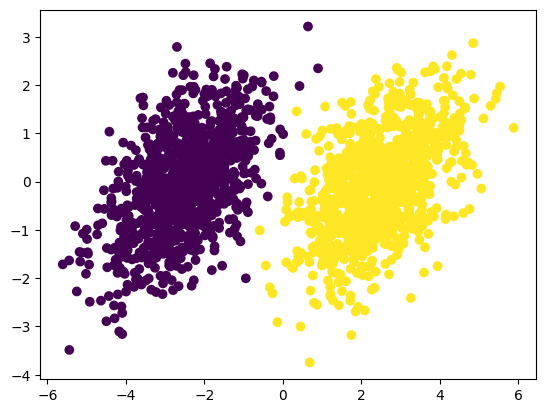

In [55]:
import matplotlib.pyplot as plt

plt.scatter(dataset[:, 0], dataset[:, 1], c=labels[:, 0])
plt.show()

Now let's implement a simple linear regression model using TensorFlow. We will define the model, loss function, and optimization algorithm, and then train the model on our dataset.

In [57]:
import tensorflow as tf
input_dim = 2
output_dim = 1
training_rate = 1e-1

W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim), dtype=tf.dtypes.float32))
b = tf.Variable(tf.zeros(shape=(output_dim, ), dtype=tf.dtypes.float32))

def model(input, W, b):
    return tf.matmul(input, W) + b

def lossFunction(output, label):
    return tf.reduce_mean(tf.square(label - output))
    
# @tf.function(jit_compile=True)
# @tf.function
def batchTrainingStep(input_batch, labels, W, b):
    with tf.GradientTape() as tape:
        prediction = model(input_batch, W, b)
        loss = lossFunction(prediction, labels)
    dW, db = tape.gradient(loss, [W, b])
    W.assign_sub(training_rate * dW)
    b.assign_sub(training_rate * db)
    return loss
    
for i in range(40):
    loss = batchTrainingStep(dataset, labels, W, b)
    print(f"Loss at step {i}: {loss:.4f}")


Loss at step 0: 3.8659
Loss at step 1: 0.9501
Loss at step 2: 0.3195
Loss at step 3: 0.1554
Loss at step 4: 0.0972
Loss at step 5: 0.0691
Loss at step 6: 0.0532
Loss at step 7: 0.0434
Loss at step 8: 0.0373
Loss at step 9: 0.0335
Loss at step 10: 0.0311
Loss at step 11: 0.0295
Loss at step 12: 0.0286
Loss at step 13: 0.0280
Loss at step 14: 0.0276
Loss at step 15: 0.0273
Loss at step 16: 0.0272
Loss at step 17: 0.0271
Loss at step 18: 0.0270
Loss at step 19: 0.0270
Loss at step 20: 0.0270
Loss at step 21: 0.0270
Loss at step 22: 0.0269
Loss at step 23: 0.0269
Loss at step 24: 0.0269
Loss at step 25: 0.0269
Loss at step 26: 0.0269
Loss at step 27: 0.0269
Loss at step 28: 0.0269
Loss at step 29: 0.0269
Loss at step 30: 0.0269
Loss at step 31: 0.0269
Loss at step 32: 0.0269
Loss at step 33: 0.0269
Loss at step 34: 0.0269
Loss at step 35: 0.0269
Loss at step 36: 0.0269
Loss at step 37: 0.0269
Loss at step 38: 0.0269
Loss at step 39: 0.0269


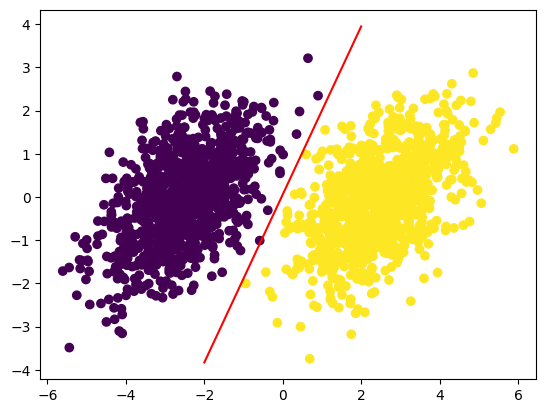

In [66]:
predictions = model(dataset, W, b)
x = np.linspace(-2, 2, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(dataset[:, 0], dataset[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

### PyTorch
PyTorch is an open-source deep learning framework developed by Facebook's AI Research lab. It has a first-class support for the famous model-sharing platform Hugging Face. It supports both CPU and GPU computations and offers a wide range of tools and libraries for various machine learning tasks. PyTorch API is higher level, including abstractions for layers, models and optimizers, making it easier to build and train neural networks.

Let's see some syntax examples in PyTorch.

#### Constant tensors


In [2]:
# Constant tensors
import torch

# Useful for initializations
t = torch.ones(size=(2, 1)) # In other platforms, the parameter it is called shape
print(t, "\n")

t = torch.zeros(size=(2, 1))
print(t, "\n")

t = torch.tensor([1, 2, 3], dtype=torch.float32)
print(t, "\n")

# Random tensors
t = torch.normal(
        mean=torch.zeros(size=(3, 1)), # Mean and std deviation have to be of the same
        std=torch.ones(size=(3, 1))    # size as the tensor itself
    )
print(t, "\n")

# Random tensor with uniform distribution
t = torch.rand(3, 1) # Argument separated, different from TensorFlow and NumPy
print(t, "\n")

# Another difference from TensorFlow: elements of tensors are assignable
t[0, 0] = 1.
print(t)

tensor([[1.],
        [1.]]) 

tensor([[0.],
        [0.]]) 

tensor([1., 2., 3.]) 

tensor([[-1.9393e-04],
        [ 1.6088e+00],
        [-1.9815e-01]]) 

tensor([[0.1889],
        [0.9461],
        [0.1329]]) 

tensor([[1.0000],
        [0.9461],
        [0.1329]])


Similar to `Variable`s in TensorFlow, PyTorch provides `Parameter`s that are tensors that can be optimized during training.

In [3]:
t = torch.zeros(size=(2, 1))
p = torch.nn.parameter.Parameter(data=t)

#### Tensor operations
Here are some examples of basic tensor operations in PyTorch:

In [4]:
a = torch.tensor([[2.0, 2.0], [2.0, 2.0]], dtype=torch.float32)
print(a, "\n")
b = torch.square(a)
print(b, "\n")
c = torch.sqrt(a)
print(c, "\n")
d = b + c
print(d, "\n")
e = a @ b # Equivalent to torch.matmul(a, b)
print(e, "\n")
f = torch.cat((a, b), dim=0)
print(f, "\n")
g = torch.cat((a, b), dim=1)
print(g, "\n")


tensor([[2., 2.],
        [2., 2.]]) 

tensor([[4., 4.],
        [4., 4.]]) 

tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]]) 

tensor([[5.4142, 5.4142],
        [5.4142, 5.4142]]) 

tensor([[16., 16.],
        [16., 16.]]) 

tensor([[2., 2.],
        [2., 2.],
        [4., 4.],
        [4., 4.]]) 

tensor([[2., 2., 4., 4.],
        [2., 2., 4., 4.]]) 



And that's how a dense layer can be implemented from scratch in PyTorch.

In [10]:
def dense(inputs, W, b):
    return torch.relu(torch.matmul(inputs, W) + b)

input = torch.tensor([1.0, 1.0], dtype=torch.float32)
W = torch.tensor([[2.0], [2.0]], dtype=torch.float32)
b = torch.tensor([[3.0], [3.0]], dtype=torch.float32)

print(dense(input, W, b))

tensor([[7.],
        [7.]])


#### Gradient computation
Behind the scenes, PyTorch uses a dynamic computation graph to compute gradients. This means that the graph is built on-the-fly while we perform operations on tensors. To enable gradient computation for a tensor, we need to set the `requires_grad` attribute to `True` when creating the tensor. PyTorch will then automatically track all operations performed on that tensor and build the computation graph accordingly. Here is an example of how to compute gradients in PyTorch:

In [12]:
input_var = torch.tensor(3.0, requires_grad=True)
result = torch.square(input_var)
result.backward() # Performing back propagation on the output
print(input_var.grad) # the 'grad' attribute gets filled

result = torch.square(input_var)
result.backward()
print(input_var.grad) # Beware: it accumulates, it DOES NOT get overwritten

input_var.grad = None # That's the way to reset the gradients


tensor(6.)
tensor(12.)


#### Example: Linear regression with PyTorch
We can implement the same linear regression model using the PyTorch tools we introduced up to now.

In [14]:
input_dim = 2
output_dim = 1
learning_rate = 0.1

W = torch.rand(input_dim, output_dim, requires_grad=True)
b = torch.zeros(output_dim, requires_grad=True)

def model(inputs, W, b):
    return inputs @ W + b

def mean_squared_error(targets, predictions):
    per_sample_losses = torch.square(targets - predictions)
    return torch.mean(per_sample_losses)


def training_step(inputs, targets, W, b):
    predictions = model(inputs)
    loss = mean_squared_error(targets, predictions)
    loss.backward()
    grad_loss_wrt_W, grad_loss_wrt_b = W.grad, b.grad
    with torch.no_grad():
        W -= grad_loss_wrt_W * learning_rate
        b -= grad_loss_wrt_b * learning_rate
    W.grad = None
    b.grad = None
    return loss

We implemented the linear regression model using only the low-level interface of PyTorch, without using any high-level abstractions.
One of the high-level abstractions provided by PyTorch is the `Module` class, which can be used to define neural network layers and models.

In [17]:
class LinearModel(torch.nn.Module):
    # In the constructor, it is necessary to instantiate the 'Parameter's
    def __init__(self):
        super().__init__()
        self.W = torch.nn.Parameter(torch.rand(input_dim, output_dim))
        self.b = torch.nn.Parameter(torch.zeros(output_dim))

    # It is required to override the 'forward' method.
    def forward(self, inputs):
        return torch.matmul(inputs, self.W) + self.b
    
# Let's call the model, the output will be random
model = LinearModel()
model(torch.tensor([2.0, 2.0]))


tensor([3.2966], grad_fn=<AddBackward0>)

The other helpful high-level interface is the `torch.optim` module, which provides various optimization algorithms for training neural networks. We will use Stochastic Gradient Descent (SGD) to optimize our linear regression model.

In [18]:
learning_rate = 0.1

model = LinearModel()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def training_step(inputs, targets):
    predictions = model(inputs)
    loss = mean_squared_error(targets, predictions)
    loss.backward()
    optimizer.step()
    model.zero_grad()
    return loss

Finally, it is possible to use compilation in PyTorch with the decorator `torch.compile` (that can be used also as a function on a model) to optimize the execution of the model.

In [19]:
@torch.compile
def dense(inputs, W, b):
    return torch.relu(torch.matmul(inputs, W) + b)